# Chapter 4: Training Models - Notebook Reproduksi Kode

Bab ini membahas secara mendalam bagaimana model Machine Learning dilatih.
Kita akan melihat:
- Regresi Linier dan Solusi Persamaan Normal (Normal Equation).
- Berbagai varian Gradient Descent (Batch, Stochastic, Mini-batch).
- Regresi Polinomial untuk data non-linier.
- Kurva Pembelajaran untuk mendeteksi underfitting/overfitting.
- Model Linier Regularisasi (Ridge, Lasso, Elastic Net) dan Early Stopping.
- Regresi Logistik dan Softmax untuk klasifikasi.

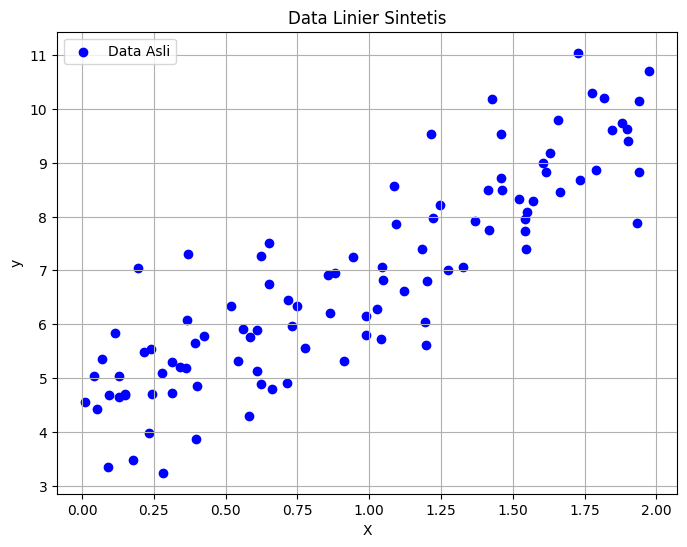


--- Regresi Linier (Persamaan Normal) ---
Theta terbaik yang ditemukan (b0, b1): [4.21509616 2.77011339]
Prediksi untuk X_new = [0 2]: [4.21509616 9.75532293]


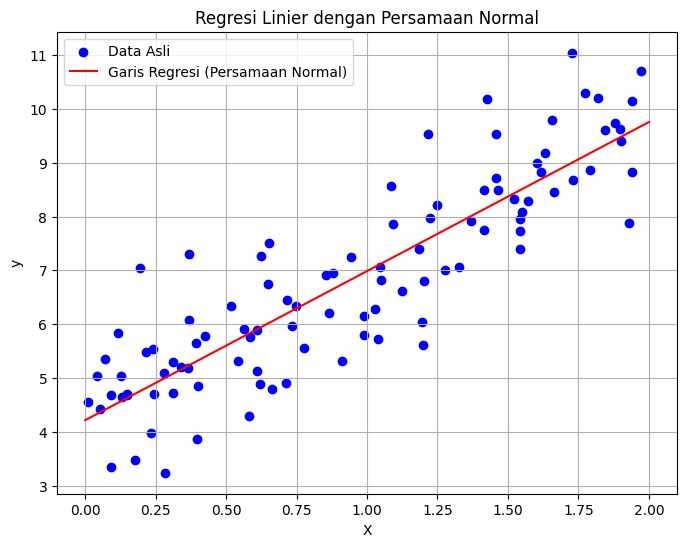


--- Regresi Linier (Scikit-Learn) ---
Intercept (theta_0): [4.21509616]
Koefisien (theta_1): [2.77011339]
Prediksi untuk X_new = [0 2]: [4.21509616 9.75532293]

--- Batch Gradient Descent (BGD) dari Scratch ---
Theta BGD yang ditemukan: [4.21509616 2.77011339]
Perhatikan ini sangat mirip dengan hasil Persamaan Normal.

--- Stochastic Gradient Descent (SGD) dari Scratch ---
Theta SGD yang ditemukan: [4.18475289 2.73036719]
Perhatikan ini juga mirip dengan hasil Persamaan Normal, tetapi lebih fluktuatif.

--- SGDRegressor (Scikit-Learn) ---
Intercept SGDRegressor: [6.78214707]
Koefisien SGDRegressor: [1.62898402]


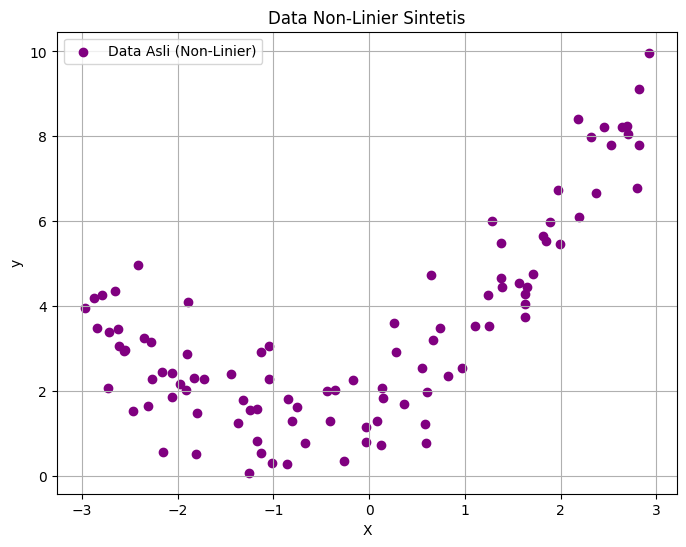


--- Regresi Polinomial (Degree 2) ---
Contoh X_poly (asli): [-0.75275929]
Contoh X_poly_transformed (x dan x^2): [-0.75275929  0.56664654]
Intercept lin_reg_poly: [1.78134581]
Koefisien lin_reg_poly: [0.93366893 0.56456263]


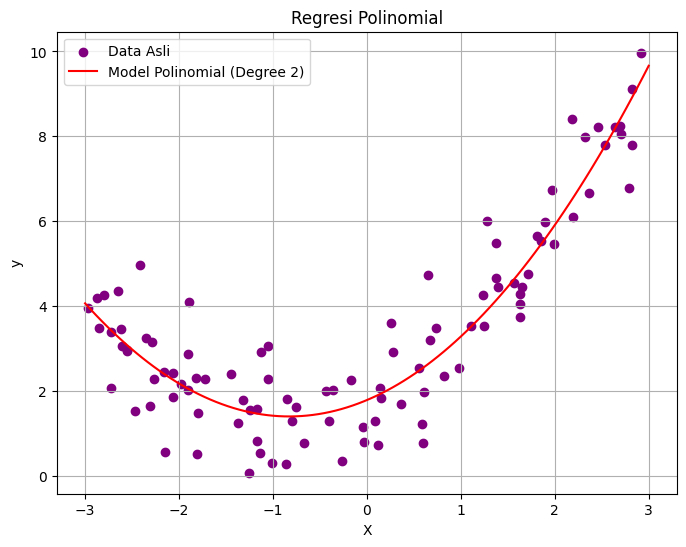


--- Kurva Pembelajaran (Contoh Underfitting - Regresi Linier) ---


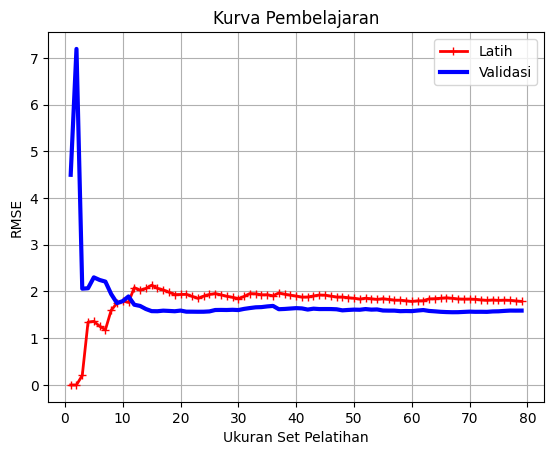


--- Kurva Pembelajaran (Contoh Overfitting - Regresi Polinomial Degree Tinggi) ---


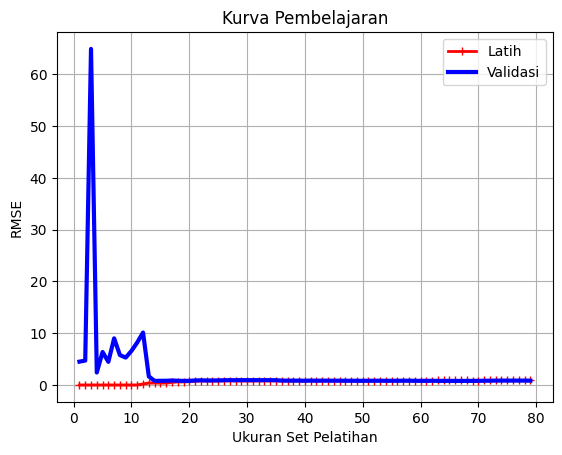


--- Ridge Regression ---
Ridge coef: [1.48342701]
SGDRegressor (Ridge) coef: [1.48076388]

--- Lasso Regression ---
Lasso coef: [1.39826128]
SGDRegressor (Lasso) coef: [1.48119182]

--- Elastic Net Regression ---
Elastic Net coef: [1.37929645]

--- Early Stopping ---
Melatih SGDRegressor dengan Early Stopping...
Epoch 100: Val RMSE = 1.5916
Epoch 200: Val RMSE = 1.5914
Epoch 300: Val RMSE = 1.5914
Epoch 400: Val RMSE = 1.5914
Epoch 500: Val RMSE = 1.5914
Berhenti lebih awal pada epoch 514. Model terbaik dari epoch 463.
RMSE validasi terbaik: 1.5914 pada epoch 463

--- Regresi Logistik (Klasifikasi Biner) ---


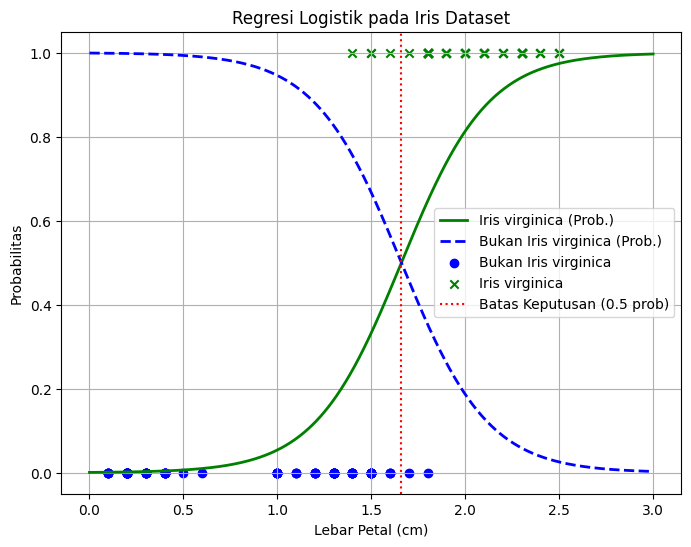

Prediksi untuk lebar petal [1.7] dan [1.5]: [1 0]

--- Softmax Regression (Klasifikasi Multikelas) ---
Prediksi untuk [panjang petal=5, lebar petal=2]: [2]
Probabilitas prediksi: [6.21626374e-07 5.73689802e-02 9.42630398e-01]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


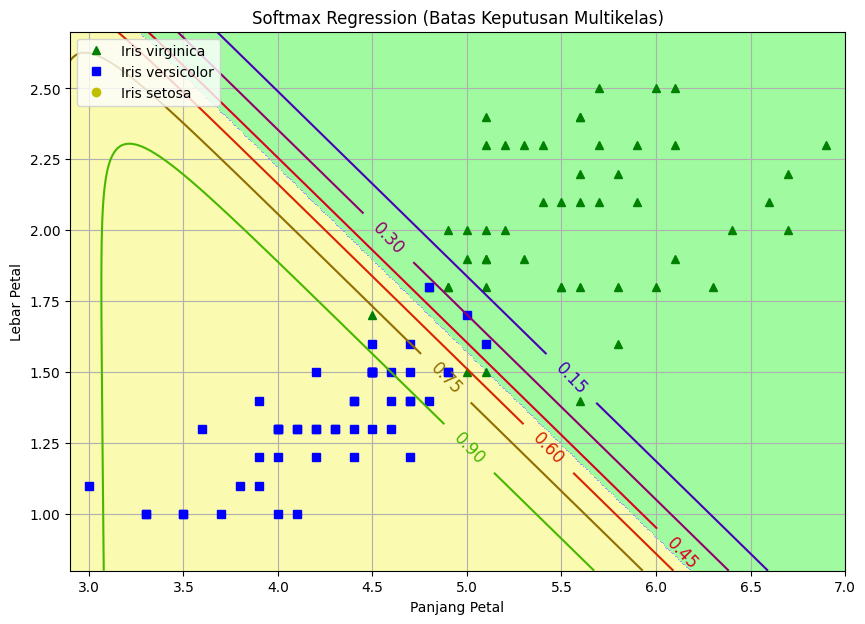


--- Selesai Reproduksi Kode Chapter 4 ---


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import clone # Import clone untuk Early Stopping
from sklearn import datasets # Untuk dataset Iris

# --- 1. Regresi Linier ---

# a. Generasi Data Linier Sintetis
np.random.seed(42)
X_linear = 2 * np.random.rand(100, 1) # 100 sampel, 1 fitur
y_linear = 4 + 3 * X_linear + np.random.randn(100, 1) # y = 4 + 3x + noise

plt.figure(figsize=(8, 6))
plt.scatter(X_linear, y_linear, color='blue', label='Data Asli')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Linier Sintetis')
plt.grid(True)
plt.legend()
plt.show()

# b. Solusi Persamaan Normal (Normal Equation)
# Tambahkan x0 = 1 ke setiap instance (untuk bias term)
X_b = np.c_[np.ones((100, 1)), X_linear] # X_b bentuknya [100, 2]

# Hitung theta_best menggunakan Persamaan Normal
# theta_best = (X_b.T * X_b)^-1 * X_b.T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_linear)

print(f"\n--- Regresi Linier (Persamaan Normal) ---")
print(f"Theta terbaik yang ditemukan (b0, b1): {theta_best.ravel()}") # .ravel() untuk array 1D

# Prediksi menggunakan theta_best
X_new_linear = np.array([[0], [2]]) # Contoh data baru
X_new_b_linear = np.c_[np.ones((2, 1)), X_new_linear]
y_predict_linear = X_new_b_linear.dot(theta_best)
print(f"Prediksi untuk X_new = {X_new_linear.ravel()}: {y_predict_linear.ravel()}")

# Visualisasi garis regresi
plt.figure(figsize=(8, 6))
plt.scatter(X_linear, y_linear, color='blue', label='Data Asli')
plt.plot(X_new_linear, y_predict_linear, color='red', linestyle='-', label='Garis Regresi (Persamaan Normal)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresi Linier dengan Persamaan Normal')
plt.grid(True)
plt.legend()
plt.show()

# c. Regresi Linier dengan Scikit-Learn
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_linear, y_linear)

print(f"\n--- Regresi Linier (Scikit-Learn) ---")
print(f"Intercept (theta_0): {lin_reg_sklearn.intercept_}")
print(f"Koefisien (theta_1): {lin_reg_sklearn.coef_.ravel()}")
print(f"Prediksi untuk X_new = {X_new_linear.ravel()}: {lin_reg_sklearn.predict(X_new_linear).ravel()}")


# --- 2. Gradient Descent ---

# a. Batch Gradient Descent (BGD) dari Scratch
print(f"\n--- Batch Gradient Descent (BGD) dari Scratch ---")
eta = 0.1 # Learning rate
n_iterations = 1000
m_linear = len(X_linear) # Jumlah instance

theta_bgd = np.random.randn(2, 1) # Inisialisasi theta acak [b0, b1]

for iteration in range(n_iterations):
    # Hitung gradien MSE
    gradients = 2/m_linear * X_b.T.dot(X_b.dot(theta_bgd) - y_linear)
    # Update theta
    theta_bgd = theta_bgd - eta * gradients

print(f"Theta BGD yang ditemukan: {theta_bgd.ravel()}")
print("Perhatikan ini sangat mirip dengan hasil Persamaan Normal.")

# b. Stochastic Gradient Descent (SGD) dari Scratch
print(f"\n--- Stochastic Gradient Descent (SGD) dari Scratch ---")
n_epochs_sgd = 50
t0, t1 = 5, 50 # Hyperparameter learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

theta_sgd = np.random.randn(2, 1) # Inisialisasi theta acak

for epoch in range(n_epochs_sgd):
    for i in range(m_linear):
        random_index = np.random.randint(m_linear)
        xi = X_b[random_index:random_index+1]
        yi = y_linear[random_index:random_index+1]

        # Hitung gradien untuk satu instance
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)

        # Update learning rate
        eta_t = learning_schedule(epoch * m_linear + i)

        # Update theta
        theta_sgd = theta_sgd - eta_t * gradients

print(f"Theta SGD yang ditemukan: {theta_sgd.ravel()}")
print("Perhatikan ini juga mirip dengan hasil Persamaan Normal, tetapi lebih fluktuatif.")


# c. SGDRegressor dengan Scikit-Learn
print(f"\n--- SGDRegressor (Scikit-Learn) ---")
# Scaling fitur sangat direkomendasikan untuk Gradient Descent
scaler_sgd = StandardScaler()
X_scaled_linear = scaler_sgd.fit_transform(X_linear)

# Perbaikan: Mengganti np.inftry dengan np.inf, dan tol=-np.inf menjadi tol=None
sgd_reg_sklearn = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)
sgd_reg_sklearn.fit(X_scaled_linear, y_linear.ravel()) # .ravel() karena SGDRegressor mengharapkan y 1D

print(f"Intercept SGDRegressor: {sgd_reg_sklearn.intercept_}")
print(f"Koefisien SGDRegressor: {sgd_reg_sklearn.coef_}")
# Untuk memprediksi dengan SGDRegressor, Anda juga harus scaling input baru
# Misalnya: sgd_reg_sklearn.predict(scaler_sgd.transform([[1.5]]))


# --- 3. Regresi Polinomial ---

# a. Generasi Data Non-Linier
np.random.seed(42)
X_poly = 6 * np.random.rand(100, 1) - 3 # Data dari -3 sampai 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(100, 1) # y = 0.5x^2 + x + 2 + noise

plt.figure(figsize=(8, 6))
plt.scatter(X_poly, y_poly, color='purple', label='Data Asli (Non-Linier)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Non-Linier Sintetis')
plt.grid(True)
plt.legend()
plt.show()

# b. Transformasi Fitur Polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly_features.fit_transform(X_poly)

print(f"\n--- Regresi Polinomial (Degree 2) ---")
print(f"Contoh X_poly (asli): {X_poly[0].ravel()}")
print(f"Contoh X_poly_transformed (x dan x^2): {X_poly_transformed[0].ravel()}")

# c. Latih Model Linier pada Fitur Polinomial
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_transformed, y_poly)

print(f"Intercept lin_reg_poly: {lin_reg_poly.intercept_}")
print(f"Koefisien lin_reg_poly: {lin_reg_poly.coef_.ravel()}")

# Prediksi untuk visualisasi kurva
X_new_poly = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly_transformed = poly_features.transform(X_new_poly)
y_predict_poly = lin_reg_poly.predict(X_new_poly_transformed)

plt.figure(figsize=(8, 6))
plt.scatter(X_poly, y_poly, color='purple', label='Data Asli')
plt.plot(X_new_poly, y_predict_poly, color='red', linestyle='-', label='Model Polinomial (Degree 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresi Polinomial')
plt.grid(True)
plt.legend()
plt.show()


# --- 4. Kurva Pembelajaran ---

# Visualisasi kurva pembelajaran untuk mendeteksi underfitting/overfitting
def plot_learning_curves(model, X, y):
    X_train_part, X_val_part, y_train_part, y_val_part = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train_part)):
        model.fit(X_train_part[:m], y_train_part[:m])
        y_train_predict = model.predict(X_train_part[:m])
        y_val_predict = model.predict(X_val_part)
        train_errors.append(np.sqrt(mean_squared_error(y_train_part[:m], y_train_predict)))
        val_errors.append(np.sqrt(mean_squared_error(y_val_part, y_val_predict)))

    plt.plot(np.arange(1, len(X_train_part)), train_errors, "r-+", linewidth=2, label="Latih")
    plt.plot(np.arange(1, len(X_train_part)), val_errors, "b-", linewidth=3, label="Validasi")
    plt.legend(loc="upper right")
    plt.xlabel("Ukuran Set Pelatihan")
    plt.ylabel("RMSE")
    plt.title("Kurva Pembelajaran")
    plt.grid(True)
    plt.show()

print("\n--- Kurva Pembelajaran (Contoh Underfitting - Regresi Linier) ---")
lin_reg_underfit = LinearRegression()
plot_learning_curves(lin_reg_underfit, X_poly, y_poly) # Menggunakan data non-linier dengan model linier

print("\n--- Kurva Pembelajaran (Contoh Overfitting - Regresi Polinomial Degree Tinggi) ---")
poly_reg_overfit = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), # Degree tinggi
    ("lin_reg", LinearRegression())
])
plot_learning_curves(poly_reg_overfit, X_poly, y_poly) # Menggunakan data non-linier dengan model poli tinggi


# --- 5. Model Linier Regularisasi ---

# Skala data sebelum regularisasi
scaler_reg = StandardScaler()
X_scaled_reg = scaler_reg.fit_transform(X_poly)
y_scaled_reg = y_poly # Untuk regularisasi, y tidak perlu diskala

# a. Ridge Regression (L2 penalty)
print("\n--- Ridge Regression ---")
ridge_reg = Ridge(alpha=1, random_state=42) # alpha=1 adalah kekuatan regularisasi
ridge_reg.fit(X_scaled_reg, y_scaled_reg)
print(f"Ridge coef: {ridge_reg.coef_.ravel()}")

# Ridge dengan SGDRegressor (penalty="l2")
sgd_ridge_reg = SGDRegressor(penalty="l2", alpha=0.1/len(X_scaled_reg), max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
# alpha di SGDRegressor adalah konstanta dikalikan dengan 1/m, jadi perlu penyesuaian
sgd_ridge_reg.fit(X_scaled_reg, y_scaled_reg.ravel())
print(f"SGDRegressor (Ridge) coef: {sgd_ridge_reg.coef_}")


# b. Lasso Regression (L1 penalty)
print("\n--- Lasso Regression ---")
lasso_reg = Lasso(alpha=0.1, random_state=42) # alpha=0.1 adalah kekuatan regularisasi
lasso_reg.fit(X_scaled_reg, y_scaled_reg)
print(f"Lasso coef: {lasso_reg.coef_.ravel()}") # Perhatikan beberapa koefisien menjadi nol

# Lasso dengan SGDRegressor (penalty="l1")
sgd_lasso_reg = SGDRegressor(penalty="l1", alpha=0.1/len(X_scaled_reg), max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
sgd_lasso_reg.fit(X_scaled_reg, y_scaled_reg.ravel())
print(f"SGDRegressor (Lasso) coef: {sgd_lasso_reg.coef_}")


# c. Elastic Net (L1 + L2 penalty)
print("\n--- Elastic Net Regression ---")
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # l1_ratio = rasio L1 vs L2
elastic_net_reg.fit(X_scaled_reg, y_scaled_reg)
print(f"Elastic Net coef: {elastic_net_reg.coef_.ravel()}")


# d. Early Stopping (untuk SGDRegressor)
print("\n--- Early Stopping ---")
# Pisahkan data pelatihan dan validasi
X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(X_scaled_reg, y_scaled_reg, test_size=0.2, random_state=42)

# FIX: Mengganti tol=-np.inf
sgd_reg_es = SGDRegressor(max_iter=1, tol=None, warm_start=True, # tol=None untuk menonaktifkan toleransi
                         penalty=None, learning_rate="constant", eta0=0.001, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

print("Melatih SGDRegressor dengan Early Stopping...")
for epoch in range(1, 1001): # Batasi maksimal epoch untuk simulasi
    sgd_reg_es.fit(X_train_es, y_train_es.ravel())
    y_val_predict_es = sgd_reg_es.predict(X_val_es)
    val_error = mean_squared_error(y_val_es, y_val_predict_es)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg_es)
    else:
        # Jika error validasi mulai naik, bisa berhenti lebih awal
        # Untuk demonstrasi, kita akan berhenti setelah 50 epoch berturut-turut naik
        if epoch - best_epoch > 50: # toleransi
            print(f"Berhenti lebih awal pada epoch {epoch}. Model terbaik dari epoch {best_epoch}.")
            break
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Val RMSE = {np.sqrt(val_error):.4f}")

print(f"RMSE validasi terbaik: {np.sqrt(minimum_val_error):.4f} pada epoch {best_epoch}")
# best_model sekarang adalah model yang dihentikan paling awal


# --- 6. Regresi Logistik ---

# a. Memuat Dataset Iris
iris = datasets.load_iris()
X_iris = iris["data"][:, 3:] # Petal width
y_iris_binary = (iris["target"] == 2).astype(np.int64) # 1 jika Iris virginica, else 0

# b. Latih Model Regresi Logistik
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_iris, y_iris_binary)

print(f"\n--- Regresi Logistik (Klasifikasi Biner) ---")
# Prediksi probabilitas
X_new_iris = np.linspace(0, 3, 1000).reshape(-1, 1) # Rentang petal width
y_proba_iris = log_reg.predict_proba(X_new_iris)

plt.figure(figsize=(8, 6))
plt.plot(X_new_iris, y_proba_iris[:, 1], "g-", linewidth=2, label="Iris virginica (Prob.)")
plt.plot(X_new_iris, y_proba_iris[:, 0], "b--", linewidth=2, label="Bukan Iris virginica (Prob.)")
plt.scatter(X_iris[y_iris_binary==0], y_iris_binary[y_iris_binary==0], color='blue', marker='o', label='Bukan Iris virginica')
plt.scatter(X_iris[y_iris_binary==1], y_iris_binary[y_iris_binary==1], color='green', marker='x', label='Iris virginica')
plt.axvline(x=log_reg.intercept_ / -log_reg.coef_[0], color='red', linestyle=':', label='Batas Keputusan (0.5 prob)') # Batas keputusan
plt.xlabel("Lebar Petal (cm)")
plt.ylabel("Probabilitas")
plt.title("Regresi Logistik pada Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()

# Prediksi kelas
print(f"Prediksi untuk lebar petal [1.7] dan [1.5]: {log_reg.predict([[1.7], [1.5]])}")


# --- 7. Softmax Regression (Regresi Multinominal Logistik) ---

# a. Memuat Dataset Iris (Multiclass)
# Menggunakan semua 3 kelas Iris
X_iris_mc = iris["data"][:, (2, 3)] # Petal length, petal width
y_iris_mc = iris["target"] # Kelas 0, 1, 2

# b. Latih Model Softmax Regression
# LogisticRegression dengan multi_class="multinomial" dan solver yang sesuai
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_iris_mc, y_iris_mc)

print(f"\n--- Softmax Regression (Klasifikasi Multikelas) ---")
# Prediksi untuk contoh baru
print(f"Prediksi untuk [panjang petal=5, lebar petal=2]: {softmax_reg.predict([[5, 2]])}")
print(f"Probabilitas prediksi: {softmax_reg.predict_proba([[5, 2]]).ravel()}")

# Visualisasi batas keputusan Softmax Regression (lebih kompleks dari Logistik biasa)
# Plot ini bisa cukup rumit untuk direplikasi secara penuh dalam setiap notebook
# karena melibatkan plotting kontur batas keputusan untuk 3 kelas.
# Untuk tujuan reproduksi kode, kita akan plot contoh sederhana titik-titik keputusan.

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new_mc = np.c_[x0.ravel(), x1.ravel()]
y_proba_mc = softmax_reg.predict_proba(X_new_mc)
y_predict_mc = softmax_reg.predict(X_new_mc)

zz1 = y_proba_mc[:, 1].reshape(x0.shape)
zz = y_predict_mc.reshape(x0.shape)

plt.figure(figsize=(10, 7))
plt.plot(X_iris_mc[y_iris_mc==2, 0], X_iris_mc[y_iris_mc==2, 1], "g^", label="Iris virginica")
plt.plot(X_iris_mc[y_iris_mc==1, 0], X_iris_mc[y_iris_mc==1, 1], "bs", label="Iris versicolor")
plt.plot(X_iris_mc[y_iris_mc==0, 0], X_iris_mc[y_iris_mc==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Panjang Petal")
plt.ylabel("Lebar Petal")
plt.title("Softmax Regression (Batas Keputusan Multikelas)")
plt.legend(loc="upper left")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid(True)
plt.show()

print("\n--- Selesai Reproduksi Kode Chapter 4 ---")
